In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons

In [2]:
np.random.seed(0)
X,y = make_moons(400,noise=0.2)

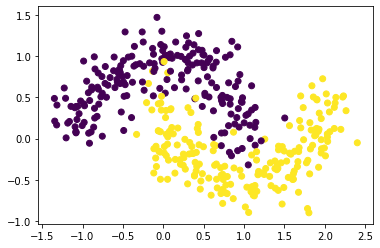

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
X[0]

array([-0.49426199,  0.94706999])

In [5]:
from matplotlib.colors import ListedColormap

In [6]:
def plot_boundary(pred_func):
    x1 = np.arange(min(X[:,0]) - 1, max(X[:,0]) + 1, 0.02)
    x2 = np.arange(min(X[:,1]) - 1, max(X[:,1]) + 1, 0.02)
    xx,yy = np.meshgrid(x1,x2)
    #z = pred_func(np.array([xx.flatten(),yy.flatten()]).T)
    # alternative
    z = pred_func(np.c_[xx.flatten(),yy.flatten()])
    z = z.reshape(xx.shape)
    
    plt.contourf(xx,yy,z, cmap=ListedColormap(('cyan','yellow')))
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Spectral)

In [7]:
logistic = LogisticRegression()
logistic.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

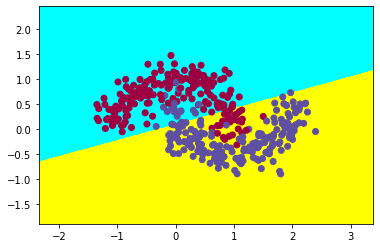

In [8]:
plot_boundary(lambda x : logistic.predict(x))

In [9]:
svm = SVC(kernel='rbf')
svm.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

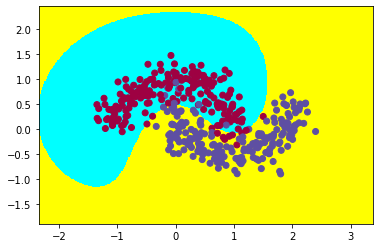

In [10]:
plot_boundary(lambda x : svm.predict(x))

In [11]:
X.shape

(400, 2)

In [12]:
input_neurons = X.shape[1]
hidden_neurons = 3
n = len(X)
output_neurons = 2
learning_rate = 0.01

In [13]:
def calculate_loss(model):
    w1,b1,w2,b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # feedforward
    z1 = np.dot(X,w1) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1,w2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores,axis=1,keepdims=True)
    
    # calculating loss
    correct_logProbs = -np.log(probs)[range(n),y]
    data_loss = np.sum(correct_logProbs)
    return data_loss

In [14]:
def predict(model,x):
    w1,b1,w2,b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # feedforward
    z1 = np.dot(x,w1) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1,w2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores,axis=1,keepdims=True)
    return np.argmax(probs,axis=1)

In [17]:
def build_model(hidden_neurons,epoch,alpha):
    w1 = np.random.randn(input_neurons,hidden_neurons)
    b1 = np.zeros((1,hidden_neurons))
    w2 = np.random.randn(hidden_neurons,output_neurons)
    b2 = np.zeros((1,output_neurons))
    
    model = {}
    
    for i in range(epoch):
        # feedforward
        z1 = np.dot(X,w1) + b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,w2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores,axis=1,keepdims=True)
        
        # backpropagation
        delta3 = probs
        delta3[range(n),y] -= 1
        delta_w2 = (a1.T).dot(delta3)
        delta_b2 = np.sum(delta3,axis=0,keepdims=True)
        
        delta2 = delta3.dot(w2.T) * (1 - np.power(a1,2))
        delta_w1 = np.dot(X.T,delta2)
        delta_b1 = np.sum(delta2,axis=0)
        
        w1 += -alpha * delta_w1
        b1 += -alpha * delta_b1
        w2 += -alpha * delta_w2
        b2 += -alpha * delta_b2
        
        model = {'W1':w1,'b1':b1,'W2':w2,'b2':b2}
        
        if i % 1000 == 0:
            loss = calculate_loss(model)
            print("Loss after {} epochs -> {}".format(i,loss))
            
    return model

In [18]:
hidden_neurons = 5
epochs = 50000
learning_rate = 0.01
model = build_model(hidden_neurons,epochs,learning_rate)

Loss after 0 epochs -> 826.8122205784236
Loss after 1000 epochs -> 30.814737691327558
Loss after 2000 epochs -> 29.284635374661605
Loss after 3000 epochs -> 28.30736133141764
Loss after 4000 epochs -> 27.683401734517854
Loss after 5000 epochs -> 27.238740935905515
Loss after 6000 epochs -> 26.90146031697659
Loss after 7000 epochs -> 26.633090259521182
Loss after 8000 epochs -> 26.407129632598107
Loss after 9000 epochs -> 26.20898414013368
Loss after 10000 epochs -> 26.03197555796063
Loss after 11000 epochs -> 25.873496866823295
Loss after 12000 epochs -> 25.73211433255218
Loss after 13000 epochs -> 25.606220268929366
Loss after 14000 epochs -> 25.49394760317918
Loss after 15000 epochs -> 25.393393995040917
Loss after 16000 epochs -> 25.302806330654246
Loss after 17000 epochs -> 25.220693238787472
Loss after 18000 epochs -> 25.14587888003679
Loss after 19000 epochs -> 25.077492197853196
Loss after 20000 epochs -> 25.01489168826364
Loss after 21000 epochs -> 24.957562106289885
Loss after

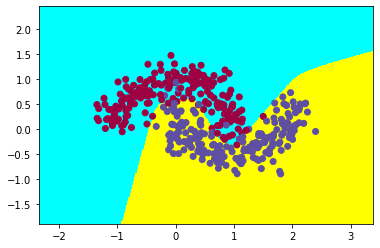

In [20]:
plot_boundary(lambda x : predict(model, x))